In [6]:
#Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
digits = load_digits()

In [7]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


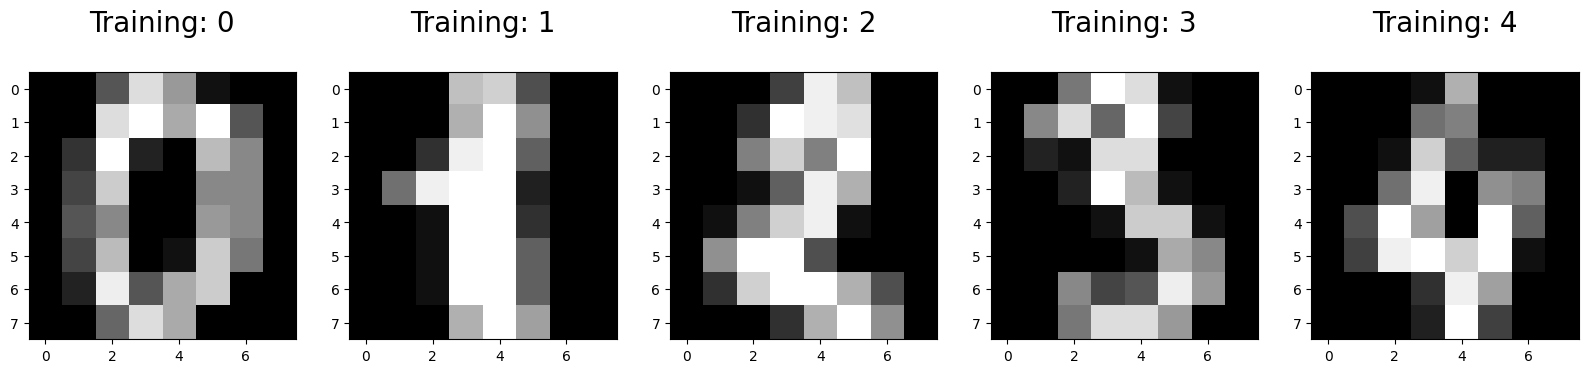

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
# Features and labels
X = digits.data
y = digits.target

In [10]:
# Split the data into train and test sets
# The purpose of splitting the data into train and test sets is to evaluate the model's performance
# on unseen data. The training set is used to train the model, and the test set is used to assess how
# well the model generalizes to new data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Tune the n_estimators parameter
# The n_estimators parameter is chosen because it determines the number of trees in the forest.
# More trees can potentially lead to a better performance but also increase computation time.
n_estimators = 100  # Selected value for testing


In [12]:
# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

In [14]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


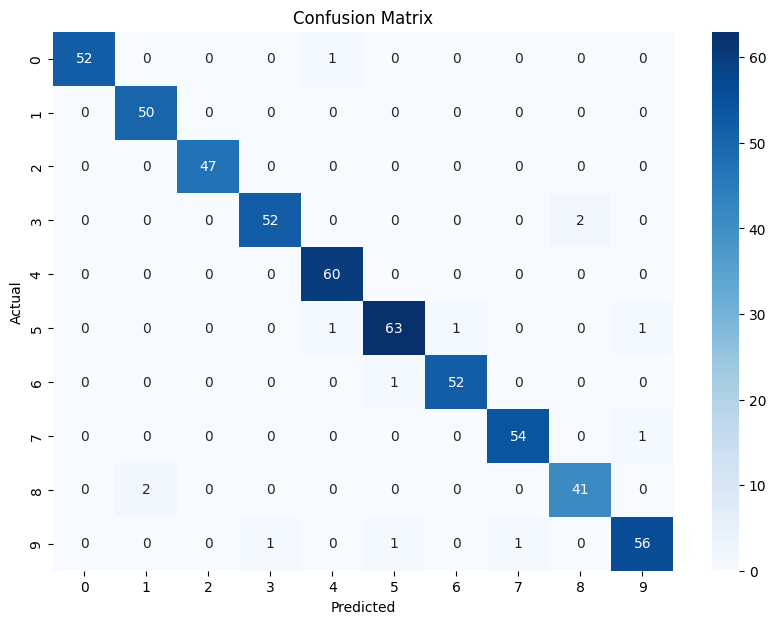

In [15]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Report accuracy, precision, recall, and f1-score
accuracy = rf_clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9759
Precision: 0.9762
Recall: 0.9764
F1-Score: 0.9762

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Discussion:
In this project, we built and evaluated a Random Forest classifier on the MNIST dataset using scikit-learn. The primary goal was to classify handwritten digits with high accuracy and to understand the model's performance metrics comprehensively.

Performance Metrics
The Random Forest classifier achieved the following performance metrics on the test set:

Accuracy: 0.9759
Precision: 0.9762
Recall: 0.9764
F1-Score: 0.9762
These metrics indicate that the classifier performs exceptionally well on the MNIST dataset. The high values across all metrics demonstrate the model's robustness and its ability to generalize well to unseen data.

Classification Report
The detailed classification report provides insights into the model's performance for each digit class:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Observations
High Precision and Recall: Most classes exhibit high precision and recall, indicating that the classifier is both accurate and sensitive in its predictions.
Class Performance: The model performs exceptionally well on digits like 0, 2, and 6, with perfect or near-perfect precision and recall. However, there are slight variations in performance across different classes, with classes 8 and 9 having marginally lower scores.
Model Struggles: The classifier shows minor struggles with classifying digits 8 and 9 compared to other digits, as reflected in their slightly lower precision and recall scores. This could be due to the similarities in the handwritten representation of these digits.
Conclusion
Overall, the Random Forest classifier demonstrated excellent performance on the MNIST dataset, achieving high accuracy, precision, recall, and F1-scores. The detailed analysis of the classification report revealed that while the model is robust and effective, there is still room for improvement, especially in distinguishing between certain similar digits.

Future work could involve experimenting with different preprocessing techniques, tuning additional hyperparameters, or exploring other classification algorithms to further enhance the model's performance. Nonetheless, the current results affirm the effectiveness of Random Forests for digit classification tasks.